# Dribbling

In [5]:
import os
import pandas as pd
import numpy as np
import re

#Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 7.0)
import seaborn as sns
pd.options.mode.chained_assignment = None
from scipy.signal import argrelmin, argrelmax

In [4]:
def processData(game_id):
    os.chdir("F:/CSV DATA")
    #Read in the data, avoid warnings
    motion=pd.read_csv("00"+str(game_id)+".csv",low_memory=False)
    #Remove any rows where there are NaN values
    motion=motion[motion.isnull().any(axis=1)==False].reset_index(drop=True)
    #Remove "stationary" events, such as free throws
    motion=motion.drop_duplicates(subset = ['quarter', 'sec_in_quarter', 'shot_clock'], keep = 'last').reset_index(drop=True)
    return(motion)

In [2]:
playershotsdf = pd.read_csv("playershotsdf.csv")

In [3]:
motion = pd.read_csv("/Volumes/EDIE ESPEJO/sta160/0021500004.csv")

In [98]:
motion.columns

Index([u'quarter', u'unique_id', u'sec_in_quarter', u'shot_clock', u'ball_x',
       u'ball_y', u'ball_z', u'player1_id', u'player1_x', u'player1_y',
       u'player2_id', u'player2_x', u'player2_y', u'player3_id', u'player3_x',
       u'player3_y', u'player4_id', u'player4_x', u'player4_y', u'player5_id',
       u'player5_x', u'player5_y', u'player6_id', u'player6_x', u'player6_y',
       u'player7_id', u'player7_x', u'player7_y', u'player8_id', u'player8_x',
       u'player8_y', u'player9_id', u'player9_x', u'player9_y', u'player10_id',
       u'player10_x', u'player10_y'],
      dtype='object')

In [6]:
def sup(a,c):
    try:
        sup=a[a>=c][0]
    except IndexError:
        return(0)
    return(sup)

def boundSup(a,b,c):
    vec_sup=np.array([sup(a,bvals) for bvals in b])
    vec_bounds=abs(vec_sup-b)
    vec_sup=np.unique(vec_sup[(vec_bounds<=c)&(vec_bounds>0)])
    return(vec_sup)

def infi(a,c):
    try:
        inf=a[a<=c][-1]
    except IndexError:
        return(0)
    return(inf)

def boundInf(a,b,c):
    vec_inf=np.array([infi(a,bvals) for bvals in b])
    vec_bounds=abs(vec_inf-b)
    vec_inf=np.unique(vec_inf[(vec_bounds<=c)&(vec_bounds>0)])
    return(vec_inf)

In [7]:
def findSupInts(motion):
    z_min=argrelmin(motion.ball_z.values)[0]
    z_min=z_min[np.in1d(z_min,np.where(motion.ball_z<10)[0])]
    z_max=argrelmax(motion.ball_z.values)[0]
    z_max=z_max[np.in1d(z_max,np.where(motion.ball_z>=10)[0])]
    lower_bound=boundInf(z_min,z_max,75)
    middle_bound=boundSup(z_max,z_min,75)
    upper_bound=boundSup(z_min,middle_bound,75)
    return(np.vstack((lower_bound,middle_bound,upper_bound)).T)

In [12]:
z_min=argrelmin(motion.ball_z.values)[0]
z_min=z_min[np.in1d(z_min, np.where(motion.ball_z<1)[0])]
z_max=argrelmax(motion.ball_z.values)[0]
z_max=z_max[np.in1d(z_max, np.where(motion.ball_z>=1)[0])]

In [13]:
z_min

array([   23,   101,   147, ..., 78693, 78839, 78962])

In [14]:
z_max

array([    1,     8,    10, ..., 78993, 78996, 79012])

In [16]:
# CLOSEST LOWER BOUND AFTER EACH DRIBBLE
boundSup(z_min, z_max, 50)

array([   23,   101,   147, ..., 78693, 78839, 78962])

In [17]:
len(boundSup(z_min, z_max, 50))

1704

In [18]:
len(z_min)

1748

In [19]:
boundInf(z_max, z_min, 50)

array([   16,    96,   128, ..., 78683, 78825, 78958])

In [20]:
len(boundInf(z_max, z_min, 50))

1704

In [62]:
dribble = np.vstack((boundInf(z_max, z_min, 50), boundSup(z_min, z_max, 50))).T

In [24]:
dribble

array([[   16,    23],
       [   96,   101],
       [  128,   147],
       ..., 
       [78683, 78693],
       [78825, 78839],
       [78958, 78962]])

In [27]:
# GET INTERVAL LENGTHS
dribble[:,1]-dribble[:,0]

array([ 7,  5, 19, ..., 10, 14,  4])

(array([   9.,    0.,   17.,    0.,   39.,    0.,   97.,    0.,  204.,
           0.,  261.,    0.,  272.,    0.,  231.,    0.,  187.,    0.,
          94.,    0.,   65.,    0.,   39.,    0.,    0.,   29.,    0.,
          23.,    0.,   23.,    0.,   13.,    0.,   12.,    0.,    6.,
           0.,    9.,    0.,   11.,    0.,    5.,    0.,   11.,    0.,
           7.,    0.,    5.,    0.,    0.,    5.,    0.,    4.,    0.,
           2.,    0.,    2.,    0.,    3.,    0.,    0.,    0.,    2.,
           0.,    5.,    0.,    2.,    0.,    2.,    0.,    1.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    2.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    1.]),
 array([  1.  ,   1.48,   1.96,   2.44,   2.92,   3.4 ,   3.88,   4.36,
          4.84,   5.32,   5.8 ,   6.28,   6.76,   7.24,   7.72,   8.2 ,
          8.68,   9.16,   9.64,  10.12,  10.6 ,  11.08,  11.56,  1

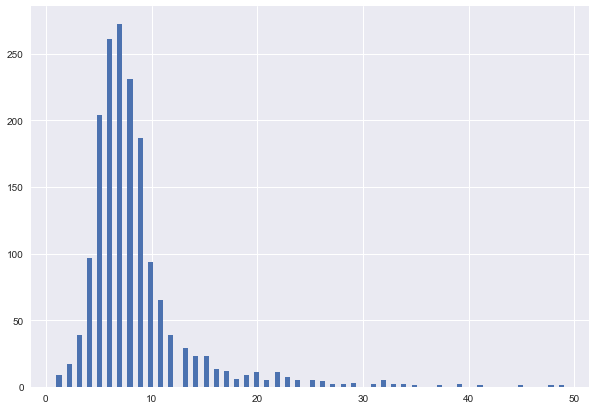

In [30]:
# PLOT HISTOGRAM OF DRIBBLE
plt.hist(dribble[:,1]-dribble[:,0], bins=100)

# First Half of Dribble

In [95]:
ball_heights = [motion.ball_z[np.arange(d[0], d[1])].reset_index(drop=True) for d in dribble]

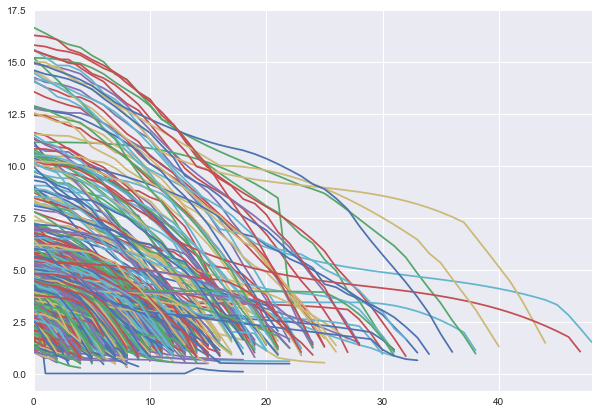

In [96]:
pd.concat(ball_heights, axis=1).plot(legend=None)

# Adding Second Half of Dribble

In [46]:
boundSup(dribble[:,1], z_max, 50)

array([   23,   101,   147, ..., 78693, 78839, 78962])

In [47]:
len(boundSup(dribble[:,1], z_max, 50))

1704

In [53]:
boundSup(z_max, dribble[:,1], 75)

array([   44,   126,   162, ..., 78702, 78852, 78993])

In [55]:
len(boundSup(z_max, dribble[:,1], 75))

1704

In [59]:
dribble2 = np.vstack((boundInf(z_max, z_min, 50), boundSup(z_min, z_max, 50), boundSup(z_max, dribble[:,1], 75))).T

In [93]:
ball_heights2 = [motion.ball_z[np.arange(d[0], d[2])].reset_index(drop=True) for d in dribble2]

In [97]:
ball_heights2

[0     4.13055
 1     4.00841
 2     3.81533
 3     3.56629
 4     2.92442
 5     2.24490
 6     1.38847
 7     0.53566
 8     0.98135
 9     1.62362
 10    2.16346
 11    2.58749
 12    3.03602
 13    3.62097
 14    3.86773
 15    4.03266
 16    4.14455
 17    4.23219
 18    4.32439
 19    4.44994
 20    4.63763
 21    4.91626
 22    5.80405
 23    6.54903
 24    7.23401
 25    7.55535
 26    7.83585
 27    8.09110
 Name: ball_z, dtype: float64, 0      3.56768
 1      3.21055
 2      2.74877
 3      2.21808
 4      1.94428
 5      0.83049
 6      1.63327
 7      2.31681
 8      2.72325
 9      3.07126
 10     3.15692
 11     3.26420
 12     3.42727
 13     3.87168
 14     4.49411
 15     5.04343
 16     5.62383
 17     6.12967
 18     6.86982
 19     7.60903
 20     8.43564
 21     8.95339
 22     9.32531
 23     9.71773
 24    10.15014
 25    10.46773
 26    10.76575
 27    10.96347
 28    11.10254
 29    11.16011
 Name: ball_z, dtype: float64, 0     11.27779
 1     11.07664
 2     1

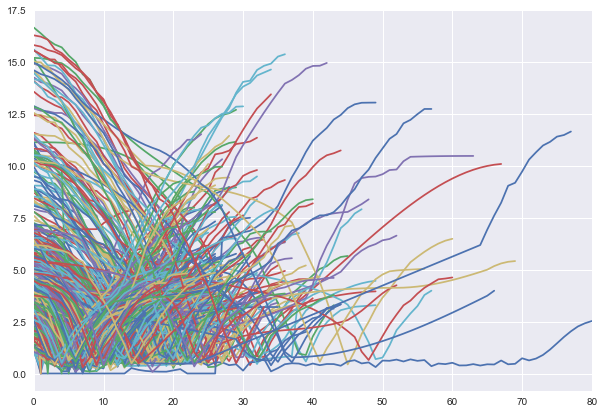

In [94]:
pd.concat(ball_heights2, axis=1).plot(legend=None)

# Adding 6 Foot Threshold to Dribble

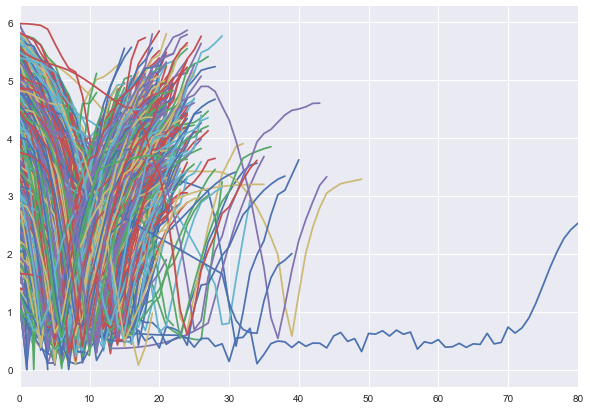

In [91]:
ball_heights4 = [motion.ball_z[np.arange(d[0], d[2])].reset_index(drop=True) for d in dribble2 if motion.ball_z[d[0]]<=6 and motion.ball_z[d[2]]<=6]
pd.concat(ball_heights4, axis=1).plot(legend=None)

# Fit A Polynomial